# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [70]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [71]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [72]:
#  1. Get the total rides for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [73]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [74]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [75]:
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [76]:
# 2. Get the total drivers for each city type

In [77]:
urban_driver_count = urban_cities_df.groupby(["city"]).sum()["driver_count"]
urban_driver_count.head()

city
Amandaburgh         216
Barajasview         572
Carriemouth        1404
Christopherfurt    1107
Deanville           931
Name: driver_count, dtype: int64

In [78]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).sum()["driver_count"]
suburban_driver_count.head()

city
Barronchester    176
Bethanyland      396
Brandonfort      190
Colemanland      506
Davidfurt        391
Name: driver_count, dtype: int64

In [79]:
rural_driver_count = rural_cities_df.groupby(["city"]).sum()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      70
Garzaport         21
Harringtonfort    24
Jessicaport        6
Lake Jamie        24
Name: driver_count, dtype: int64

In [80]:
#  3. Get the total amount of fares for each city type

In [81]:
urban_fares = urban_cities_df.groupby(["city"]).sum()["fare"]
urban_fares.head()

city
Amandaburgh        443.55
Barajasview        557.31
Carriemouth        764.49
Christopherfurt    661.55
Deanville          491.01
Name: fare, dtype: float64

In [82]:
suburban_fares = suburban_cities_df.groupby(["city"]).sum()["fare"]
suburban_fares.head()

city
Barronchester    582.76
Bethanyland      593.21
Brandonfort      673.31
Colemanland      679.68
Davidfurt        543.93
Name: fare, dtype: float64

In [83]:
rural_fare = rural_cities_df.groupby(["city"]).sum()["fare"]
rural_fare.head()

city
Bradshawfurt      400.64
Garzaport          72.37
Harringtonfort    200.82
Jessicaport       216.08
Lake Jamie        206.15
Name: fare, dtype: float64

In [84]:
#  4. Get the average fare per ride for each city type. 

In [85]:
average_fare_per_urban_ride = sum(urban_fares)/sum(urban_ride_count)
average_fare_per_urban_ride

24.52577230769231

In [86]:
average_fare_per_suburban_ride = sum(suburban_fares)/sum(suburban_ride_count)
average_fare_per_suburban_ride

30.970128000000003

In [87]:
average_fare_per_rural_ride = sum(rural_fare)/sum(rural_ride_count)
average_fare_per_rural_ride

34.62344

In [88]:
# 5. Get the average fare per driver for each city type. 

In [89]:
average_fare_per_urban_driver = sum(urban_fares)/sum(urban_driver_count)
average_fare_per_urban_driver

0.6686752122412001

In [90]:
average_fare_per_suburban_driver = sum(suburban_fares)/sum(suburban_driver_count)
average_fare_per_suburban_driver

2.2586149358226373

In [91]:
average_fare_per_rural_driver = sum(rural_fare)/sum(rural_driver_count)
average_fare_per_rural_driver

8.059459962756053

In [92]:
#  6. Create a PyBer summary DataFrame. 

In [93]:
total_drivers =  city_data_df.groupby(["type"]).sum()["driver_count"]
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]

In [94]:
Average_Fare_per_Driver = total_fare/total_drivers
Average_Fare_per_Ride = total_fare/total_rides


In [95]:
pyber_summary_df = pd.DataFrame({
          "Total Rides" : total_rides ,
          "Total Drivers": total_drivers ,
          "Total Fares": total_fare,
          "Average Fare per Ride": Average_Fare_per_Ride,
          "Average Fare per Driver": Average_Fare_per_Driver})


In [96]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [97]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [98]:
# 1. Read the merged DataFrame


In [99]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

new_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
new_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [100]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.

new_df = new_df.reset_index()
new_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [101]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
new_df = pyber_data_df.pivot(index = 'date', columns = 'type', values = 'fare' )
new_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [102]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

loc_df = new_df.loc["2019-01-01":"2019-04-29"]

loc_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [103]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
 
loc_df.index = pd.to_datetime(loc_df.index)

In [104]:
# 7. Check that the datatype for the index is datetime using df.info()
loc_df.info

<bound method DataFrame.info of type                 Rural  Suburban  Urban
date                                       
2019-01-01 00:08:16    NaN       NaN  37.91
2019-01-01 00:46:46    NaN     47.74    NaN
2019-01-01 02:07:24    NaN     24.07    NaN
2019-01-01 03:46:50    NaN       NaN   7.57
2019-01-01 05:23:21    NaN       NaN  10.75
...                    ...       ...    ...
2019-04-28 14:28:36    NaN       NaN  11.46
2019-04-28 16:29:16    NaN       NaN  36.42
2019-04-28 17:26:52    NaN       NaN  31.43
2019-04-28 17:38:09    NaN     34.87    NaN
2019-04-28 19:35:03    NaN     16.96    NaN

[2196 rows x 3 columns]>

In [105]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
resample_df = loc_df.resample('W').sum()

resample_df



type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


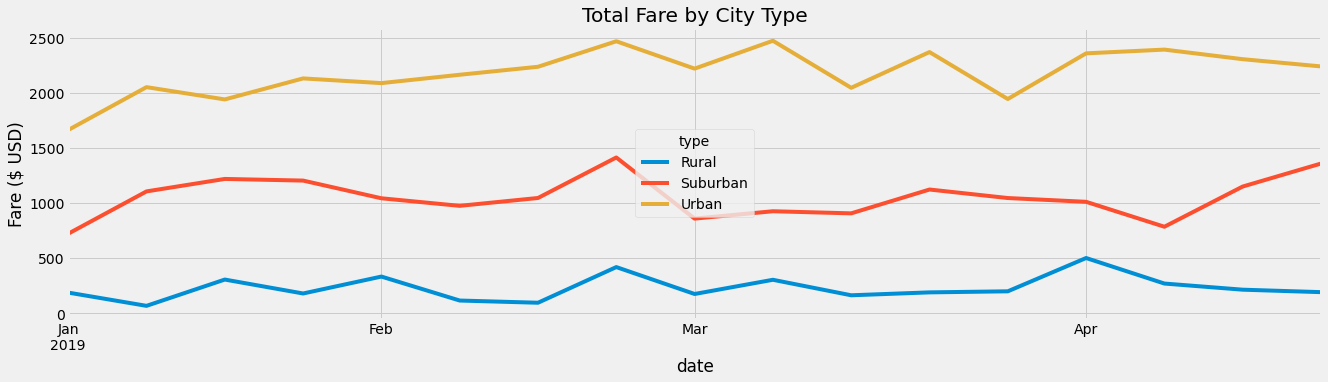

In [116]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
resample_df.plot(figsize = (20,5))

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.title("Total Fare by City Type")
plt.ylabel("Fare ($ USD)")

plt.savefig("PyBer_fare_summary.png", bbox_inches = 'tight')